## Final Project Submission

Please fill out:
* Student name: Nyla Duperval
* Student pace: Part Time
* Scheduled project review date/time: 
* Instructor name: Victor Geislinger
* Blog post URL:

In [15]:
# Your code here - remember to use markdown cells for comments as well!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
tn_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz') 

In [17]:
tn_budgets.shape

(5782, 6)

In [18]:
tn_budgets.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [19]:
tn_budgets['production_budget'] = tn_budgets['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)
tn_budgets['domestic_gross'] = tn_budgets['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(int)
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(float)
#Changed dtype for monetary sections

In [20]:
tn_budgets['release_date'] = tn_budgets['release_date'].str.replace(',', '')
tn_budgets['release_date'] = pd.to_datetime(tn_budgets['release_date'])
tn_budgets['Year'] = tn_budgets['release_date'].dt.year
#Changed dtype and created new column

In [21]:
tn_budgets = tn_budgets.drop('id', axis=1)
tn_budgets = tn_budgets.drop('release_date',1)
#Removed columns

In [22]:
tn_budgets.dtypes

movie                 object
production_budget      int32
domestic_gross         int32
worldwide_gross      float64
Year                   int64
dtype: object

In [23]:
pd.set_option('display.max_rows',10)
tn_budgets.sort_values('movie', inplace=True)
bool_series = tn_budgets['movie'].duplicated()
tn_budgets[bool_series]
#There were no dupicate movies however duplicate names. They may be remakes or movies created with same name but different plots

,movie,production_budget,domestic_gross,worldwide_gross,Year
5614,"20,000 Leagues Under the Sea",200000,8000000,8000000.0,1916
5016,A Nightmare on Elm Street,1800000,25504513,25504513.0,1984
2032,Aladdin,28000000,217350219,504050219.0,1992
4759,Alice in Wonderland,3000000,0,0.0,1951
4120,Around the World in 80 Days,6000000,42000000,42000000.0,1956
...,...,...,...,...,...
5330,Trance,950000,0,0.0,2012
1588,Twilight,37000000,192769854,402280159.0,2008
2838,Unforgettable,18000000,2483790,2483790.0,1996
4583,Unknown,3700000,26403,3355048.0,2006


In [24]:
tn_budgets.isna().sum()
#All columns show no NaN values 

movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
Year                 0
dtype: int64

Text(0.5, 0, 'Production Budget')

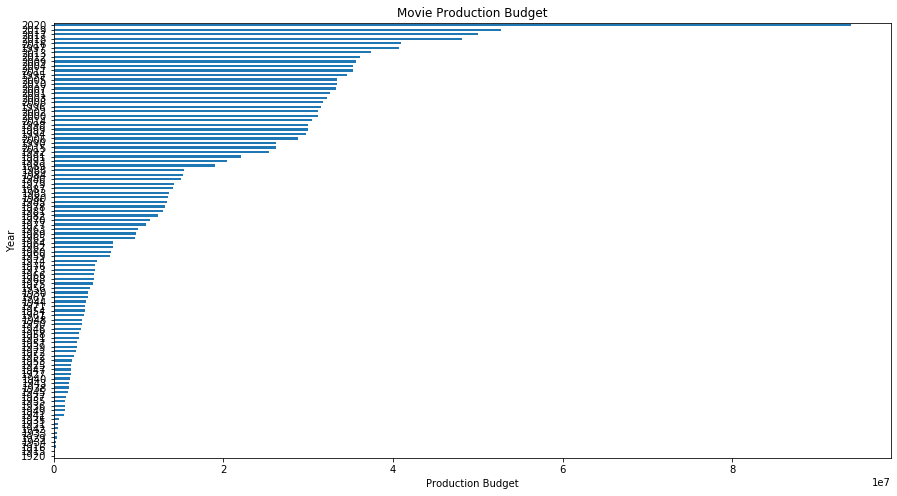

In [25]:
tn_budgets.groupby(['Year'])['production_budget'].mean().sort_values().plot(kind='barh', figsize=(15,8))
plt.title('Movie Production Budget')
plt.xlabel('Production Budget')
#From this graph we can see as time passes the average amount of production budgets also increase. Lets dig a little deeper!

In [26]:
mark_gross = tn_budgets[(tn_budgets['domestic_gross'] > 0) & (tn_budgets['worldwide_gross'] > 0)].sort_values(by='Year')
mark_gross.shape
#Created a dateframe with movies whom have a domestic and worldwide gross larger than 0.

(5234, 5)

In [27]:
dw_gross = mark_gross.sample(n=358, replace = False)
dw_gross.shape
#I choose a sample size of 358 based on research on the best sample size for this amount of data

(358, 5)

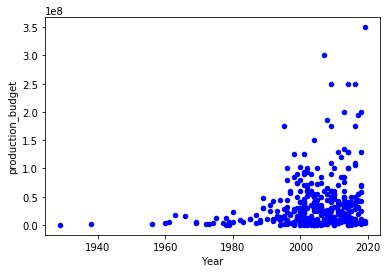

In [28]:
dw_gross.plot(kind='scatter', x='Year', y='production_budget', color='blue')
plt.show()

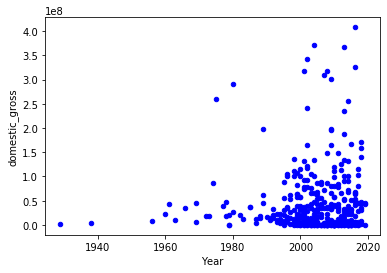

In [29]:
dw_gross.plot(kind='scatter', x='Year', y='domestic_gross',color='blue')

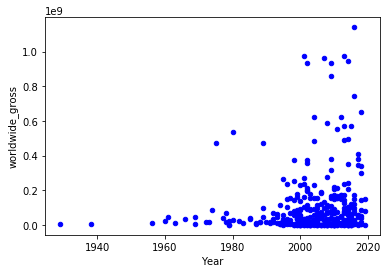

In [30]:
dw_gross.plot(kind='scatter', x='Year', y='worldwide_gross',color='blue')

In [31]:
sample_yr = dw_gross[(dw_gross['Year'] >= 2015) & (dw_gross['Year'] <= 2020)].sort_values(by='Year')
sample_yr.set_index('Year')
#A 5 year timeframe was chosen to give a more recent outlook on the industry and scatter plots above. 

,movie,production_budget,domestic_gross,worldwide_gross
Year,,,,
2015,Woman in Gold,11000000,33307793,58586407.0
2015,Loin des hommes,7700000,5336,1080428.0
2015,Insidious Chapter 3,10000000,52218558,120453155.0
2015,Ex Machina,13000000,25440971,38358392.0
2015,The Green Inferno,1000000,7192291,12931420.0
...,...,...,...,...
2018,Oceanâs 8,70000000,140218711,297115976.0
2018,Peppermint,25000000,35418723,51800758.0
2019,Five Feet Apart,7000000,45729221,80504421.0


In [44]:
sample_yr.mean()
#Total average per column.

production_budget    5.011550e+07
domestic_gross       5.235042e+07
worldwide_gross      1.386336e+08
Year                 2.016500e+03
dtype: float64

In [45]:
mean_pro = sample_yr.groupby('Year')['production_budget'].mean()
mean_pro
#Creat a new df with the average budget per year. 2015 has the lowest budget average.

Year
2015    1.675192e+07
2016    5.573333e+07
2017    5.300000e+07
2018    6.140000e+07
2019    1.203333e+08
Name: production_budget, dtype: float64

In [46]:
mean_dom = sample_yr.groupby('Year')['domestic_gross'].mean()
mean_dom
#Create a new df with the average domestic gross per year. 2019 was very successful. 

Year
2015    2.697149e+07
2016    7.409522e+07
2017    4.717462e+07
2018    6.421541e+07
2019    2.957929e+07
Name: domestic_gross, dtype: float64

In [47]:
mean_wor = sample_yr.groupby('Year')['worldwide_gross'].mean()
mean_wor
#Create a new df with the average worldwide gross per year. 2015-2018 worldwide gross are very proximate to each other.

Year
2015    7.845130e+07
2016    1.788591e+08
2017    1.505959e+08
2018    1.643050e+08
2019    7.683769e+07
Name: worldwide_gross, dtype: float64

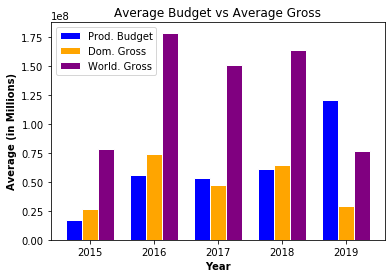

In [61]:
barWidth = 0.25
#Bar width

r1 = np.arange(len(mean_pro))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
#Assign the position of bar on X axis

plt.bar(r1, mean_pro, color='blue', width=barWidth, edgecolor='white', label='Prod. Budget')
plt.bar(r2, mean_dom, color='orange', width=barWidth, edgecolor='white', label='Dom. Gross')
plt.bar(r3, mean_wor, color='purple', width=barWidth, edgecolor='white', label='World. Gross')
#Utilzing df created from the sample df means to create plot

plt.xlabel('Year', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(mean_pro))], ['2015', '2016', '2017', '2018','2019'])
#Add xticks on the middle of bars

plt.ylabel('Average (in Millions)', fontweight='bold')

plt.title('Average Budget vs Average Gross')

plt.legend(loc=2)
plt.show()
#Show plot

In [50]:
mark1_gross = tn_budgets[(tn_budgets['domestic_gross'] == 0) & (tn_budgets['worldwide_gross'] == 0 )].sort_values(by='Year')
mark1_gross.shape

(367, 5)

In [51]:
zero_gross = mark1_gross.sample(n=188, replace = False, random_state = 188)
zero_gross.shape
#I choose a sample size of 188 based on research on the best sample size for this amount of data

(188, 5)

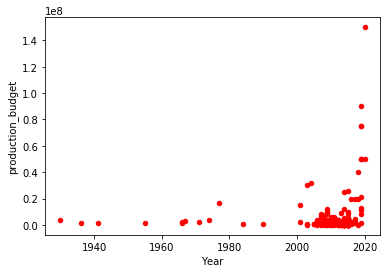

In [52]:
zero_gross.plot(kind='scatter', x='Year', y='production_budget', color='red')
#The scatter plot shows a large amount of data is located between 2000-2020. Lets investigate that area a bit more!

In [53]:
zero_yr = zero_gross[(zero_gross['Year'] >= 2015) & (zero_gross['Year'] <= 2020)].sort_values(by='Year')
zero_yr.groupby('Year')['production_budget'].mean()
#A 5 year timeframe was chosen to give a more recent outlook on the industry and scatter plot above.

Year
2015    2.429285e+06
2016    5.320000e+06
2017    7.050000e+06
2018    1.993567e+07
2019    3.945500e+07
2020    1.000000e+08
Name: production_budget, dtype: float64

In [54]:
zero_yr.mean()

production_budget    1.159625e+07
domestic_gross       0.000000e+00
worldwide_gross      0.000000e+00
Year                 2.016014e+03
dtype: float64

Text(0.5, 1.0, 'The Average Budget for Zero Revenue')

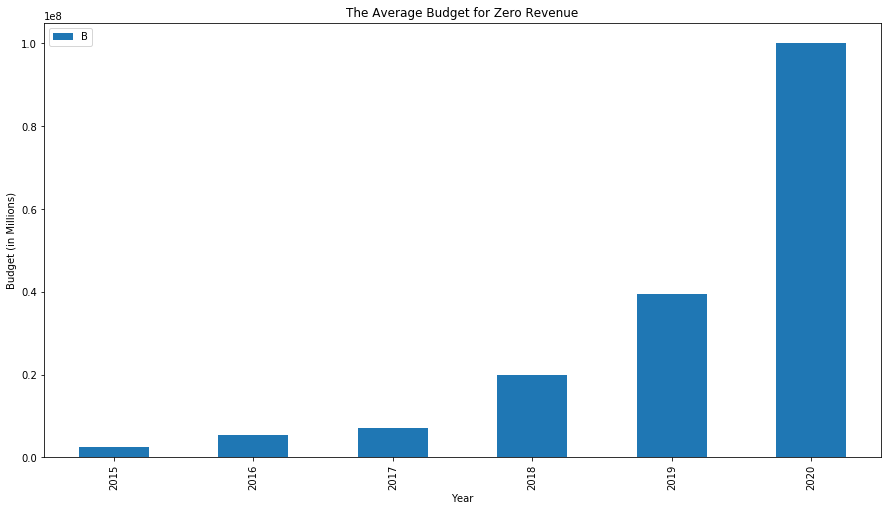

In [55]:
zero_yr.groupby('Year')['production_budget'].mean().sort_values().plot(kind='bar', figsize=(15,8))
plt.ylabel('Budget (in Millions)')
plt.legend('Budget')
plt.title('The Average Budget for Zero Revenue')
#Based on the graph, there movies had fairly large budgets however did not gain any revenue. 